# Librerías

In [19]:
pip install --user -U nltk

     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     --------------------------- ---------- 30.7/41.9 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 41.9/41.9 kB 674.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----------- ---------------------------- 0.4/1.5 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.0 kB ? eta -:--:--
   --------------------------------------- 269.0/269.0 kB 16.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install python-Levenshtein

   ---------------------------------------- 0.0/98.4 kB ? eta -:--:--
   ---------------------------------------- 98.4/98.4 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------  1.6/1.7 MB 102.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 35.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Ejercicio 1

In [1]:
import spacy

In [5]:
# Carga el modelo de lenguaje preentrenado de Spacy
nlp = spacy.load('es_core_news_lg')

# Procesa una oración con el modelo de Spacy
doc = nlp("El desayuno es la oportunidad de empezar el día conun festín de colores, sabores y nutrientes.")

# Extrae e imprime las frases nominales
for chunk in doc.noun_chunks:    
    print(chunk.text)


El desayuno
el día
conun festín de colores, sabores y nutrientes


# Ejercicio 2

## 2.1

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
# Lista de documentos (frases en español)
documents = ['¿Qué es el coseno y para quésirve?',
             '¿Cuál es el coseno de unángulo?',
             '¿Cuál es el valor del coseno?',
             '¿Qué esel coseno?', 
             'Esta es una introducción aNLP', 
             'Es probable que sea útil para laspersonas', 
             'Machine learning es la nuevaelectricidad', 
             'Habrá menos exageraciónsobre la IA y más acción enadelante', 
             '¡Python es la mejorherramienta!', 
             'Python es un buenlenguaje', 
             'Me gusta este libro', 
             'Quieromás libros como este']

# Calcular TF-IDF: ingeniería de características
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mostrar las dimensiones de la matriz TF-IDF
print(tfidf_matrix.shape)

# Calcular la similitud del coseno para la primera oración con el resto de las oraciones
similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

# Encontrar el índice de la frase más semejante (excluyendo la primera frase)
most_similar_index = similarity_matrix.argsort()[0, -2]

# Imprimir la frase más semejante
print(f"La frase más semejante a '{documents[0]}' es: '{documents[most_similar_index]}'")

(12, 43)
La frase más semejante a '¿Qué es el coseno y para quésirve?' es: '¿Qué esel coseno?'


## 2.2

**Comparación de Similitud de Jaccard & Similitud de Dice**

In [2]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer

In [7]:

# Similitud de Dice 
def dice_similarity(set_a, set_b):
    intersection = set_a.intersection(set_b)
    return 2 * len(intersection) / (len(set_a) + len(set_b))

frase_1 = "El gato negro salta sobre el sofá."
frase_2 = "El gato negro salta encima del sofá."

set_a = set(frase_1.split())
set_b = set(frase_2.split())

similarity = dice_similarity(set_a, set_b)
print(f"Dice Similarity between\n\"{frase_a}\"\nand\n\"{frase_b}\"\nis: {similarity}\n")

# Similitud de Jaccard 
frases = [
    ("El gato negro salta sobre el sofá.", "El gato negro salta encima del sofá."),
]

for frase_a, frase_b in frases:
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform([frase_a, frase_b])
    
    vector_1 = X[0].toarray()[0]
    vector_2 = X[1].toarray()[0]
    
    similarity = jaccard_score(vector_1, vector_2, average='micro')
    print(f"Jaccard Similarity between\n\"{frase_a}\"\nand\n\"{frase_b}\"\nis: {similarity}\n")

Dice Similarity between
"El gato negro salta sobre el sofá."
and
"El gato negro salta encima del sofá."
is: 0.7142857142857143

Jaccard Similarity between
"El gato negro salta sobre el sofá."
and
"El gato negro salta encima del sofá."
is: 0.45454545454545453



## 2.3

In [9]:
import Levenshtein

In [11]:
apellidos = [("Gómez", "Gómez"),
             ("Fernández", "Hernández"),
             ("López", "Lopes"),
             ("Pérez", "Perez"),
             ("García", "González"),
             ("Ramírez", "Rodríguez"),
             ("Sánchez", "Sanchez"),
             ("Torres", "Torres"),
             ("Díaz", "Diaz"),]


for apellido_a, apellido_b in apellidos:
    distance = Levenshtein.distance(apellido_a, apellido_b)
    print(f"Levenshtein Distance: {distance}")
    


Levenshtein Distance: 0
Levenshtein Distance: 1
Levenshtein Distance: 2
Levenshtein Distance: 1
Levenshtein Distance: 7
Levenshtein Distance: 5
Levenshtein Distance: 1
Levenshtein Distance: 0
Levenshtein Distance: 1


# Ejercicio 3

**Obtenemos el texto**

In [50]:
import requests

In [47]:
url = "https://raw.githubusercontent.com/aleoncavallo/tuia_nlp_2023/main/texto_train.txt"
response = requests.get(url)
textos  = response.text

**TF-IDF**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import sent_tokenize
import nltk

In [58]:
nltk.download('punkt')

sentencias = sent_tokenize(textos)

contador_1 = 0
contador_2 = 0

dataset = []

# Dividir las sentencias en grupos de 20
for i in range(0, len(sentencias), 20):
    grupo = [(i//20, sentencia) for sentencia in sentencias[i:i+20]]
    dataset.extend(grupo)
    
# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

labels = [(0, "cocina"), 
          (1, "equitación"), 
          (2, "ciencia"),
          (3, "medicina")]

# Preparar X e y
X = [text.lower() for label, text in dataset]
y = [label for label, text in dataset]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística con multinomial
modelo_LR = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 0.6875
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      0.83      0.91         6
           2       0.50      1.00      0.67         2
           3       0.50      1.00      0.67         3

    accuracy                           0.69        16
   macro avg       0.75      0.76      0.64        16
weighted avg       0.84      0.69      0.65        16



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\src4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\src4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


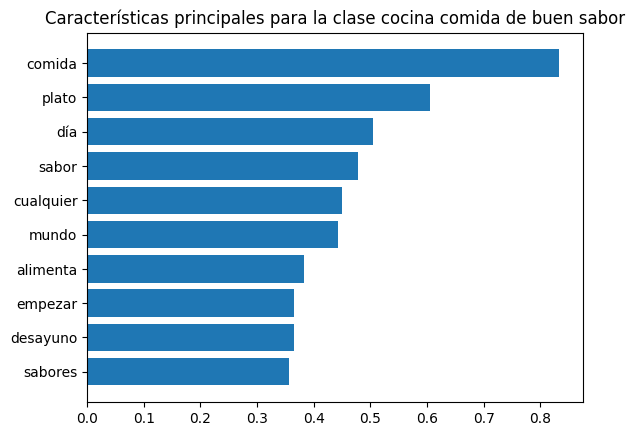

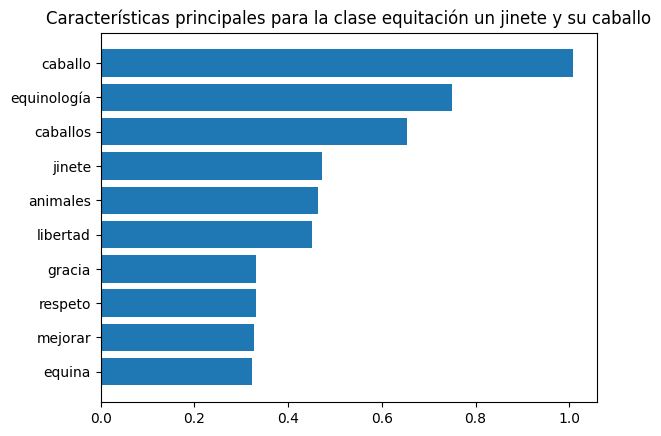

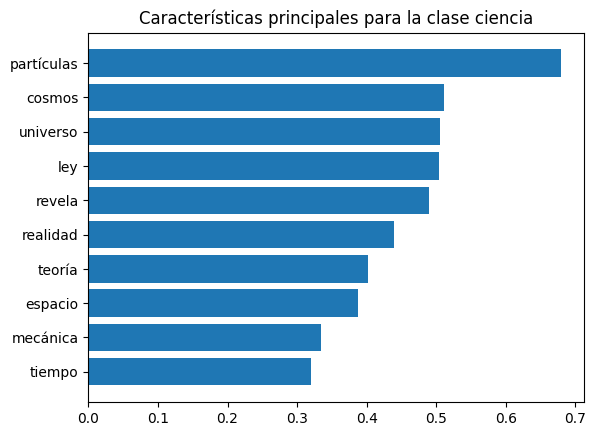

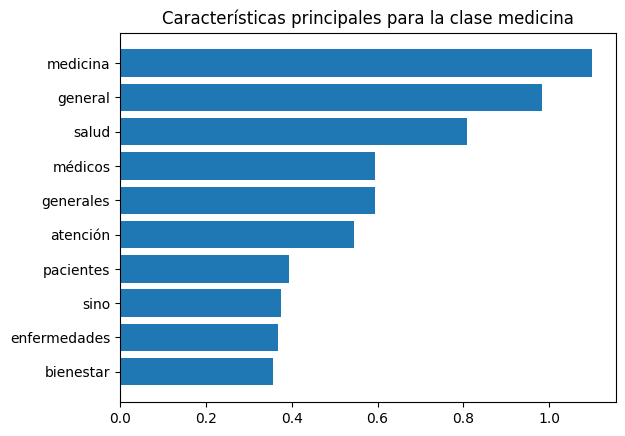

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Obtén los nombres de las características y los coeficientes
feature_names = vectorizer.get_feature_names_out()
coef = modelo_LR.coef_

# Visualiza los coeficientes más importantes para cada clase
num_top_features = 10
for i, label in labels:
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]
    
    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.show()